In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("data/titanic_dataset.csv")

## Gráfico 1: conteos simples

### ¿Cuántos pasajeros hay por clase?

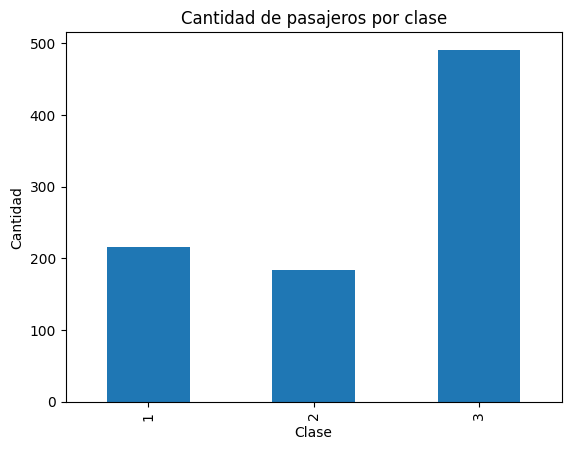

In [13]:
df["Pclass"].value_counts().sort_index().plot(kind="bar")
plt.title("Cantidad de pasajeros por clase")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()

### ¿Cuantos hombres y mujeres habian a bordo?

Text(0, 0.5, 'Cantidad')

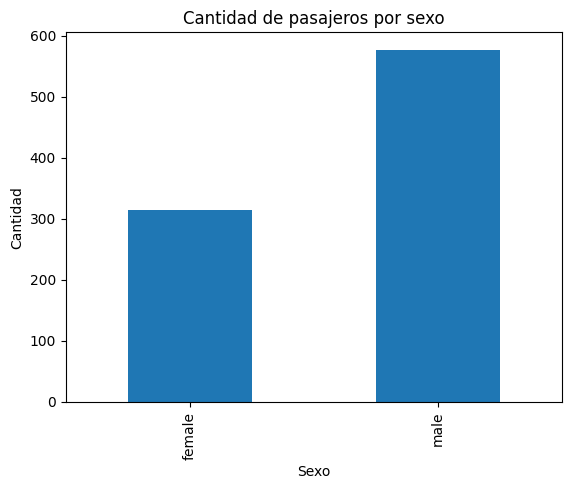

In [20]:
df["Sex"].value_counts().sort_index().plot(kind="bar")
plt.title("Cantidad de pasajeros por sexo")
plt.xlabel("Sexo")
plt.ylabel("Cantidad")

## Gráfico 2: supervivencia por clase

### ¿Qué clase sobrevivió más en proporción?

In [23]:
df.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

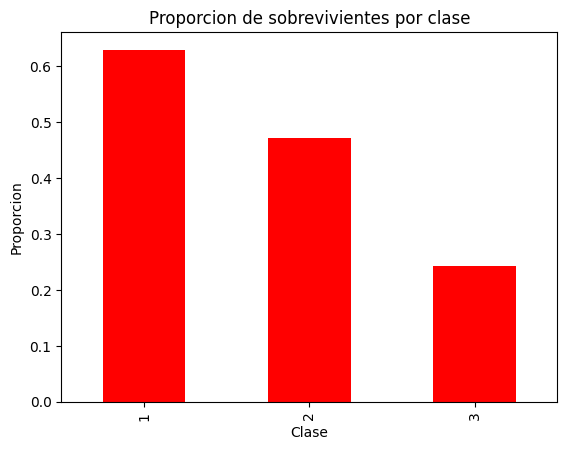

In [127]:
class_alive = df.groupby("Pclass")["Survived"].mean()
class_alive.plot(kind="bar", color="red")
plt.title("Proporcion de sobrevivientes por clase")
plt.xlabel("Clase")
plt.ylabel("Proporcion")
plt.show()

## Gráfico 3: edades (Histograma)

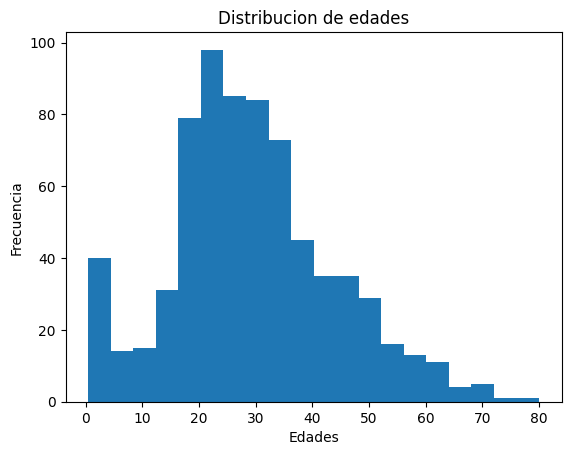

In [54]:
age_hist = df["Age"].plot(kind="hist",bins=20)
plt.title("Distribucion de edades")
plt.xlabel("Edades")
plt.ylabel("Frecuencia")
plt.show()

Nota: Existe una acumulación anómala de edades muy bajas que podría deberse a problemas de registro o redondeo.

### ¿Cómo se distribuyen las edades?

## Grafico 4: Promedio de supervivencia por sexo

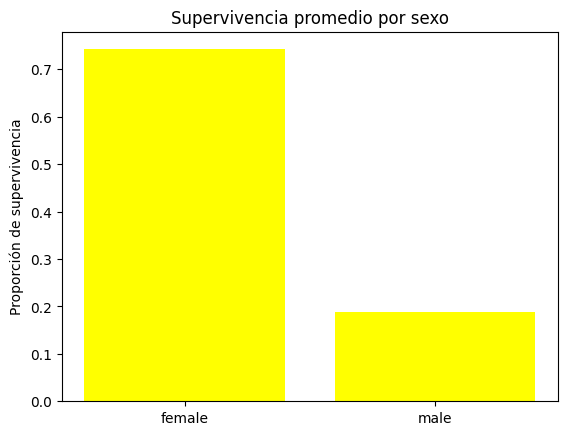

In [61]:
prom = df.groupby("Sex")["Survived"].mean()

x = prom.index
y = prom.values

plt.bar(x, y, color="yellow")
plt.ylabel("Proporción de supervivencia")
plt.title("Supervivencia promedio por sexo")
plt.show()


## Grafico 5: Conteo de sobrevivientes por sexo

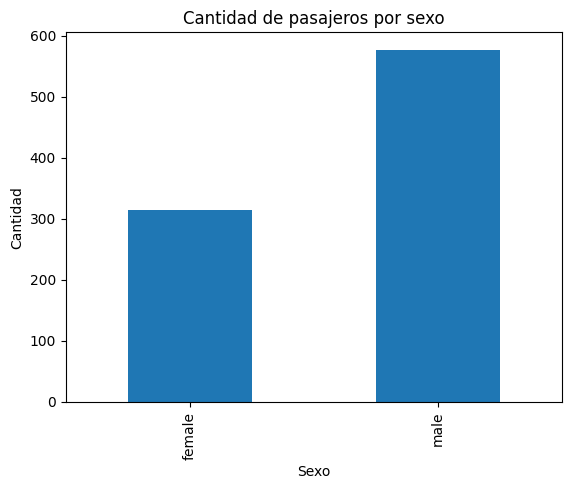

In [137]:
df["Sex"].value_counts().sort_index().plot(kind="bar")
plt.title("Cantidad de pasajeros por sexo")
plt.xlabel("Sexo")
plt.ylabel("Cantidad")
plt.show()

## Grafico 6: Conteo apilado de sobrevivientes mujeres y hombres

### Serie de datos de sobrevivientes y fallecidos segun sexo

Conteo de los casos de supervivencia diferenciadas por sexo

In [7]:
conteo2 = df.groupby("Sex")["Survived"].value_counts()
print("Tipo de dato:",type(conteo2))
conteo2

Tipo de dato: <class 'pandas.Series'>


Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

si hago el grafico a partir de aqui me arroja cuatro columnas, donde 1 es vivo y 0 es muerto

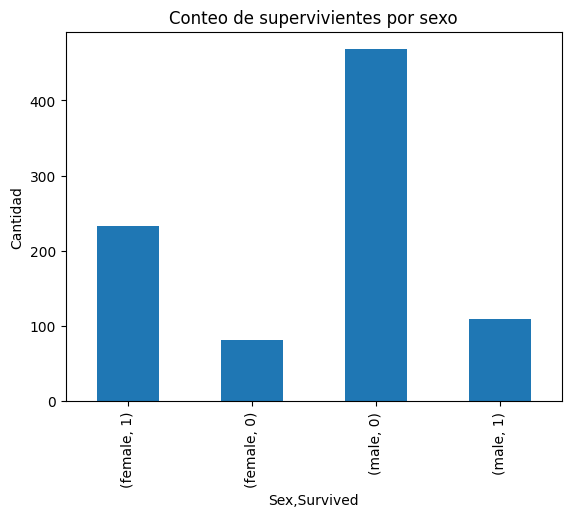

In [8]:
conteo2.plot(kind="bar", stacked=True)
plt.title("Conteo de supervivientes por sexo")
plt.ylabel("Cantidad")
plt.show()

### Tabla de datos de sobrevivientes fallecidos segun sexo

conteo de los casos de supervivencia diferenciados por sexo, convertidos a datos de tipo pandas.DataFrame con el metodo .unstack()

In [10]:
conteo3 = df.groupby("Sex")["Survived"].value_counts().unstack()
print("Tipo de dato:",type(conteo3))
conteo3

Tipo de dato: <class 'pandas.DataFrame'>


Survived,0,1
Sex,,
female,81,233
male,468,109


Esto me va a dar por resultado un grafico con los grupos de hombres y mujeres apilados

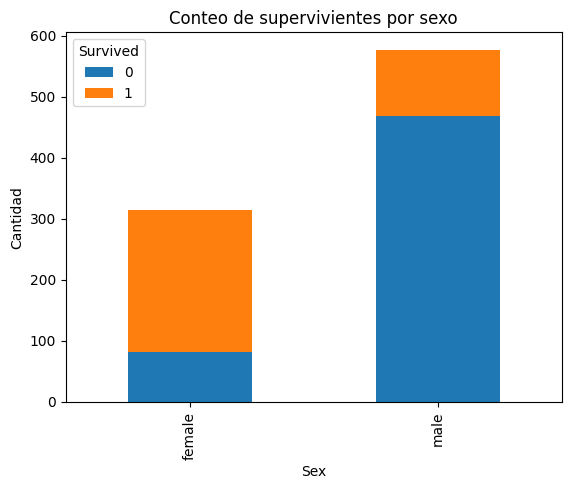

In [13]:
conteo3.plot(kind="bar", stacked=True)
plt.title("Conteo de supervivientes por sexo")
plt.ylabel("Cantidad")
plt.show()

## gráfico 7: Proporciones apiladas de sobrevivientes por sexo 

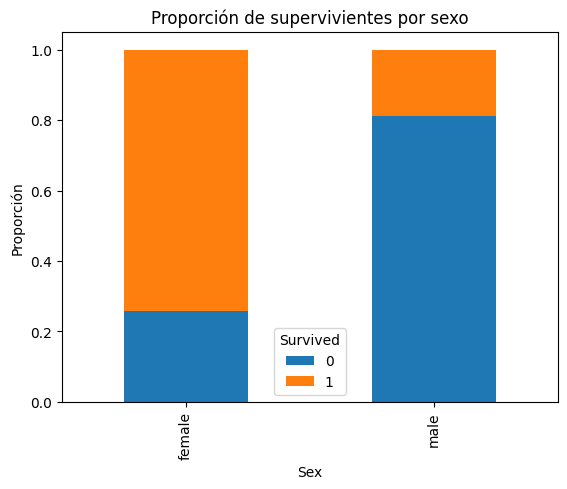

In [18]:
proporcion = conteo3.div(conteo3.sum(axis=1), axis=0)

proporcion.plot(kind="bar", stacked=True)
plt.title("Proporción de supervivientes por sexo")
plt.ylabel("Proporción")
plt.show()

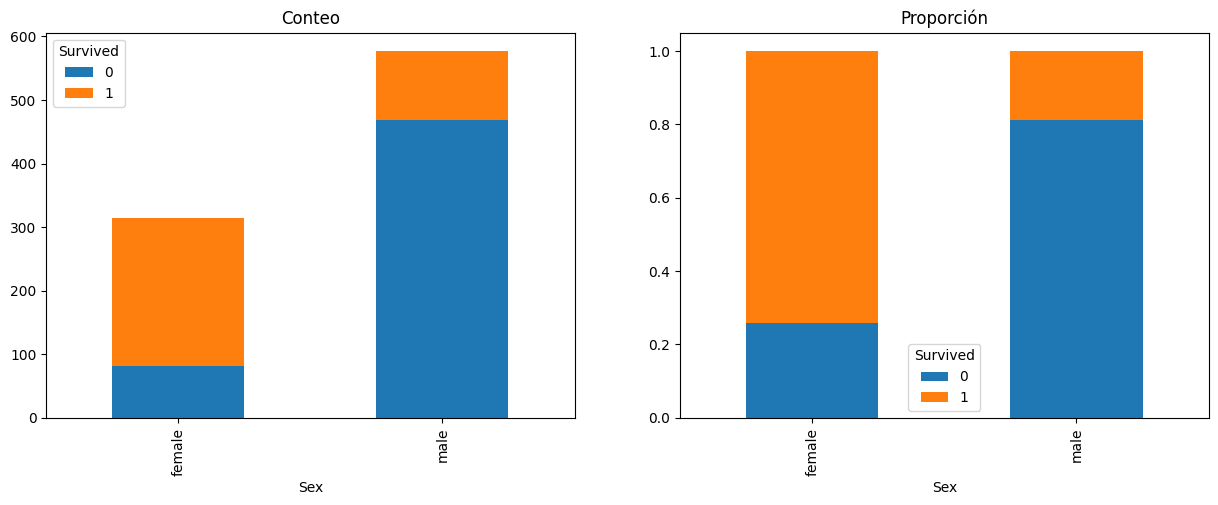

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
conteo3.plot(kind="bar", stacked=True, ax=ax[0])
ax[0].set_title("Conteo")
proporcion.plot(kind="bar", stacked=True, ax=ax[1])
ax[1].set_title("Proporción")
plt.show()

## Otros graficos

### Gaficos de tarifa segun edad

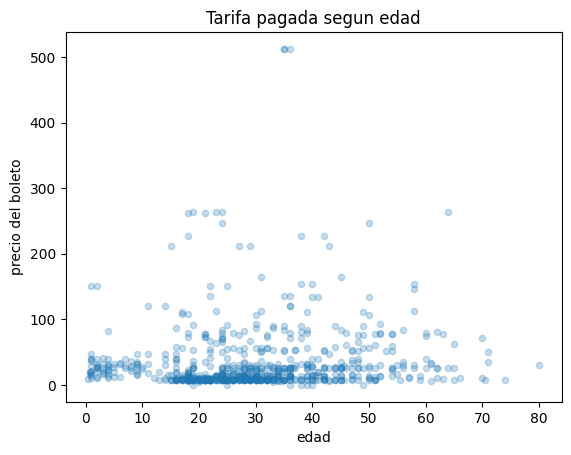

In [45]:
df.plot(kind="scatter", x="Age", y="Fare", alpha=0.25)
plt.title("Tarifa pagada segun edad")
plt.ylabel("precio del boleto")
plt.xlabel("edad")
plt.show()

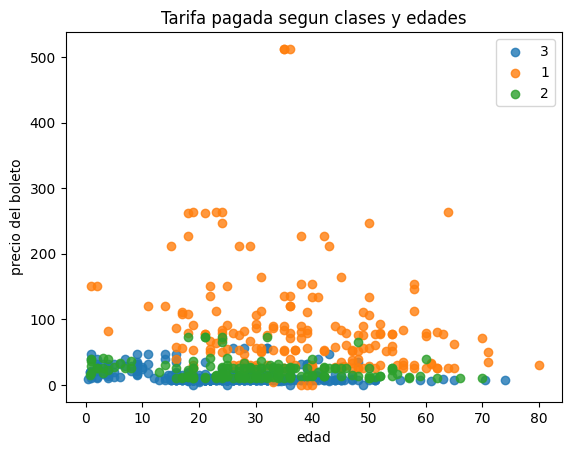

In [113]:
for clase in df["Pclass"].unique():
    subset = df[df["Pclass"] == clase]
    plt.scatter(subset["Age"], subset["Fare"], label=clase, alpha=0.8)

plt.legend()
plt.title("Tarifa pagada segun clases y edades")
plt.ylabel("precio del boleto")
plt.xlabel("edad")
plt.show()
